In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
test = pd.read_csv("/content/Corona_NLP_test.csv",encoding="latin-1")
train = pd.read_csv("/content/Corona_NLP_train.csv",encoding="latin-1")


In [4]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
print(f"Train set have {train.shape[1]} columns, {train.shape[0]} rows")
print(f"Test set have {test.shape[1]} columns, {test.shape[0]} rows")

Train set have 6 columns, 41157 rows
Test set have 6 columns, 3798 rows


DATA CLEANING

In [7]:
import pandas as pd
import re

def cleaning(data):

    df = data.copy()

    # Convert column names to lowercase
    df.columns = map(str.lower, df.columns)

    # Select 'originaltweet' and 'sentiment' colunms
    df = df[['originaltweet', 'sentiment']]

    def remove_web_urls(text): return re.sub(r'https?://\S+', ' ', text)
    df['originaltweet'] = df['originaltweet'].apply(remove_web_urls)

    def remove_tags(text): return re.sub(r'@\w*', ' ' , text)
    df['originaltweet'] = df['originaltweet'].apply(remove_tags)

    def remove_hashtags(text): return re.sub(r'#\w*', ' ' , text)
    df['originaltweet'] = df['originaltweet'].apply(remove_hashtags)

    def remove_apostrophe(text): return re.sub(r"'s\b", "", text)
    df['originaltweet'] = df['originaltweet'].apply(remove_apostrophe)

    def remove_special_chars(text): return re.sub(r"[^a-zA-Z0-9\s]", ' ', text)
    df['originaltweet'] = df['originaltweet'].apply(remove_special_chars)

    def remove_number(text): return re.sub(r'[\d]', ' ', text)
    df['originaltweet'] = df['originaltweet'].apply(remove_number)

    # Convert the 'originaltweet' column to lowercase
    df['originaltweet'] = df['originaltweet'].str.lower()
    return df

# Apply function to dataframe
cleaned_train = cleaning(train)
cleaned_test = cleaning(test)

In [8]:
'''
Show transformed results by compare with an original.
'''

# Define how many example we want to show.
n_sample = 2

# Genareated a random iterger which represent an index of dataframe
samples = np.random.randint(0,len(cleaned_train['originaltweet'])-1,n_sample)

# Compare sentence of each index
for i in range(len(samples)):
    print(f"Sample# {i+1}")
    print()
    print("ORIGINAL")
    print(train['OriginalTweet'][samples[i]])
    print("-"*150)
    print('CLEANED')
    print(cleaned_train['originaltweet'][samples[i]])
    print()
    print("="*150)
    print()

Sample# 1

ORIGINAL


https://t.co/CldPjA64Ne https://t.co/4gUVq3VKAX
------------------------------------------------------------------------------------------------------------------------------------------------------
CLEANED


   


Sample# 2

ORIGINAL




#QuarantineLife #COVID19 #coronavirus https://t.co/rZ330HRdgk
------------------------------------------------------------------------------------------------------------------------------------------------------
CLEANED




       




In [9]:
def label_preprocessing(data):

    df = data.copy()

    # mapping label
    df['sentiment'] = df['sentiment'].replace({'Extremely Negative': 'negative',
                                                   'Negative': 'negative',
                                                   'Neutral': 'neutral',
                                                   'Positive': 'positive',
                                                   'Extremely Positive': 'positive'})

    df['sentiment'] = df['sentiment'].replace({'negative':-1 , 'neutral':0, 'positive':1})

    return df

#####################################

# Apply function to dataframe
processed_train = label_preprocessing(cleaned_train)
processed_test = label_preprocessing(cleaned_test)

X_train = processed_train[['originaltweet']]
y_train = processed_train.sentiment

X_test = processed_test[['originaltweet']]
y_test = processed_test.sentiment



In [10]:
"""
Stemming
"""
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize


def stemming(data):

    # Define a function to stem a sentence
    def stem_sentence(sentence):

        # Initialize PorterStemmer
        stemmer = PorterStemmer()

        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        # Stem each word and return the stemmed sentence
        return ' '.join([stemmer.stem(word) for word in words])

    df = data.copy()
    df['originaltweet'] = df['originaltweet'].apply(stem_sentence)
    return df


###################################

# Apply the function to the 'originaltweet' column
stemmed_X_train = stemming(X_train)
stemmed_X_test = stemming(X_test)
print('STEMMING COMPLETED')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


STEMMING COMPLETED


Lemmatization

In [11]:

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


In [12]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [13]:

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

lemma = WordNetLemmatizer()
def lemmatized(data):

    def lemma_sentence(sentence):
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        return ' '.join([lemma.lemmatize(word) for word in words])
    df = data.copy()
    df['originaltweet'] = df['originaltweet'].apply(lemma_sentence)
    return df

################################################################


# Apply the function to the 'originaltweet' column
lemmatized_X_train = lemmatized(X_train)
lemmatized_X_test = lemmatized(X_test)

print("lemmeatized completed")

lemmeatized completed


Vectorization


In [14]:
"""
Tf-IDf Vectorizer
"""
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

tfidf_X_train = tfidf_vectorizer.fit_transform(lemmatized_X_train.originaltweet)
tfidf_X_test = tfidf_vectorizer.transform(lemmatized_X_test.originaltweet)

print(tfidf_vectorizer.get_feature_names_out()[:10])
print(tfidf_X_train.A[:2])

['aa' 'aaa' 'aaaaas' 'aaaand' 'aaannnddd' 'aabutan' 'aahh' 'aajeevika'
 'aalto' 'aamen']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [15]:
"""
Bags-of-words Vectorizer
"""

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics

count_vectorizer = CountVectorizer(stop_words='english')

count_X_train = count_vectorizer.fit_transform(lemmatized_X_train.originaltweet)
count_X_test = count_vectorizer.transform(lemmatized_X_test.originaltweet)

print(count_vectorizer.get_feature_names_out()[:10])
count_X_train.A[:2]

['aa' 'aaa' 'aaaaas' 'aaaand' 'aaannnddd' 'aabutan' 'aahh' 'aajeevika'
 'aalto' 'aamen']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Naive Bayes Classifier

In [16]:
'''
Simple Naive Bayes classifier function
'''

from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

def train_nb_model(X_train, y_train, X_test, y_test):
    nb_classifier = MultinomialNB()

    nb_classifier.fit(X_train, y_train)

    pred = nb_classifier.predict(X_test)

    score = metrics.accuracy_score(y_test, pred)

    print("Score: ",score)
    print()

    return pred

Confusion Matrix

In [17]:
'''
Plot the confusion matrix function
'''
def plot_cm(y_true, y_pred):
    # Plot the confusion matrix
    # create a DataFrame from y_true and y_pred
    df = pd.DataFrame({'y_true': y_test, 'y_pred': pred})

    # create cross-tabulation matrix
    ctab = pd.crosstab(df['y_true'], df['y_pred'])

    # Reorder the index and columns
    new_order = [-1,0,1]
    ctab = ctab.reindex(index=new_order, columns=new_order)

    # Define classfication labels
    labels = ['negative', 'neutral','positive']

    cm = metrics.confusion_matrix(y_test, pred, labels=[-1,0,1])

    plt.figure(figsize=(3,3))
    sns.heatmap(ctab, annot=True, cmap='Blues', fmt='d',xticklabels=labels, yticklabels=labels, cbar=False)
    plt.ylabel('Actual', fontsize=14)
    plt.xlabel('Predicted', fontsize=14)
    plt.show()



Score:  0.6761453396524486



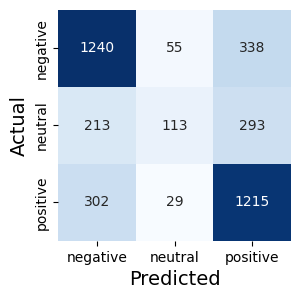

In [18]:
pred = train_nb_model(X_train = count_X_train,
             y_train = y_train,
             X_test = count_X_test,
             y_test = y_test)
plot_cm(y_test, pred)